In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [14]:
# Load datasets
fundamentals = pd.read_csv("fundamentals1.csv")
prices = pd.read_csv("prices-split-adjusted.csv")

# Merge datasets on Ticker Symbol / symbol
df = fundamentals.merge(prices, left_on='Ticker Symbol', right_on='symbol')

In [15]:
# Calculate Price-to-Earnings (P/E) and Price-to-Book (P/B) ratios
df['P/E'] = df['close'] / df['Net Income']
df['P/B'] = df['close'] / df['Total Equity']

# Sort data by date
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Ticker Symbol', 'date'])

# Apply Exponential Moving Average (EMA) for smoothing
df['P/E_EMA'] = df.groupby('Ticker Symbol')['P/E'].transform(lambda x: x.ewm(span=10, adjust=False).mean())
df['P/B_EMA'] = df.groupby('Ticker Symbol')['P/B'].transform(lambda x: x.ewm(span=10, adjust=False).mean())

# Visualization
sns.set(style='darkgrid')
def plot_ratios(ticker):
    data = df[df['Ticker Symbol'] == ticker]
    plt.figure(figsize=(12, 6))
    plt.plot(data['date'], data['P/E_EMA'], label='P/E (EMA)', color='blue')
    plt.plot(data['date'], data['P/B_EMA'], label='P/B (EMA)', color='red')
    plt.xlabel('Date')
    plt.ylabel('Ratio')
    plt.title(f'{ticker} - P/E & P/B Ratios Over Time')
    plt.legend()
    plt.show()

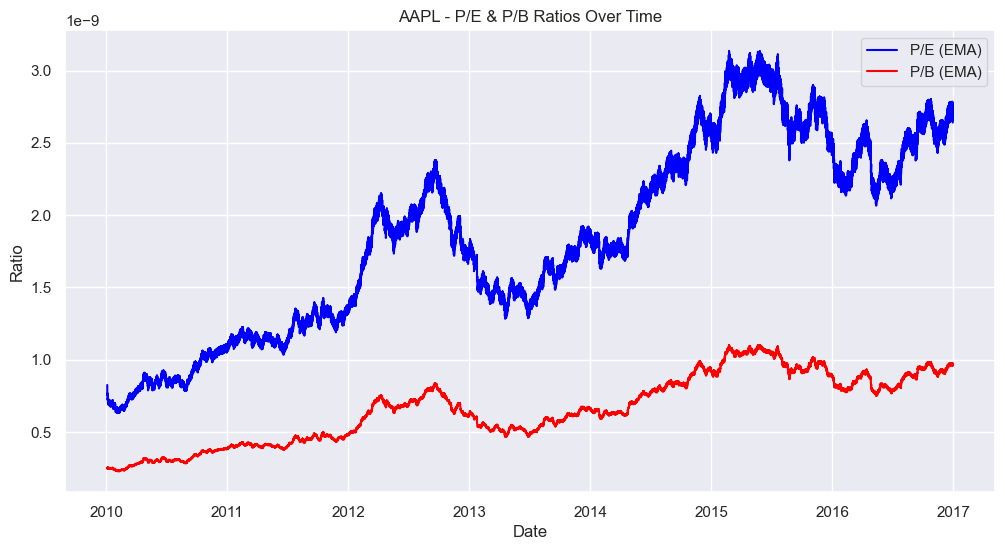

In [16]:
selected_stock = 'AAPL'

# stock ticker time series data
plot_ratios(selected_stock) 

c:\Users\Nikkhil_Bisht\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nikkhil_Bisht\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nikkhil_Bisht\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nikkhil_Bisht\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: Use

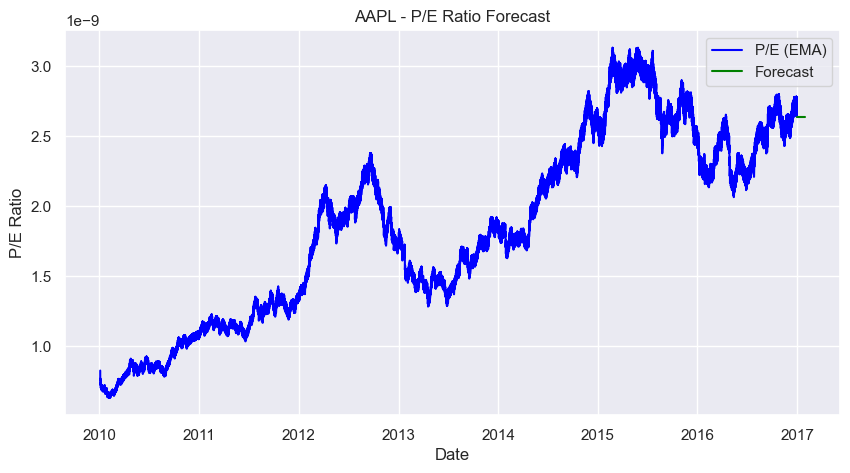

In [23]:
 

# Anomaly detection (flagging extreme P/E values)
df['PE_Anomaly'] = np.abs(df['P/E'] - df['P/E_EMA']) > 2 * df['P/E'].std()

# ARIMA Forecasting for P/E ratio
def forecast_pe(ticker):
    stock_data = df[df['Ticker Symbol'] == ticker]
    stock_data = stock_data[['date', 'P/E_EMA']].dropna()
    stock_data.set_index('date', inplace=True)
    
    model = ARIMA(stock_data['P/E_EMA'], order=(5,1,1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=30)  # Predict next 30 days
    
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['P/E_EMA'], label='P/E (EMA)', color='blue')
    plt.plot(pd.date_range(stock_data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('P/E Ratio')
    plt.title(f'{ticker} - P/E Ratio Forecast')
    plt.legend()
    plt.show()

forecast_pe(selected_stock)
